#### Image segmentation using Histograms

In [31]:
#importing modules
import scipy.ndimage as snd
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import io, img_as_float,img_as_ubyte
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

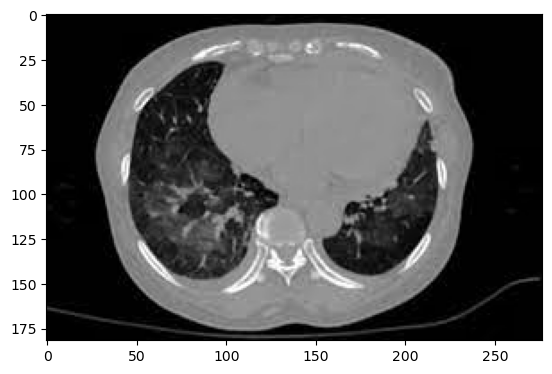

In [32]:
img = cv2.imread('image.jpeg')
img = np.asarray(img,dtype='float32')
sigma_estimated = np.mean(estimate_sigma(img,multichannel=True))
denoised_img = denoise_nl_means(img,h=1.15*sigma_estimated, fast_mode=False, patch_size=7, patch_distance=5, multichannel=True)
#converting to uint8
denoised_img = np.asarray(denoised_img,dtype='uint8')
plt.imshow(denoised_img)

(array([5.1591e+04, 3.2340e+03, 1.4370e+03, 1.9080e+03, 4.3500e+02,
        1.3050e+03, 8.6100e+02, 1.4400e+03, 1.0590e+03, 1.4730e+03,
        1.6200e+03, 9.9300e+02, 1.6140e+03, 1.0020e+03, 1.5480e+03,
        9.5100e+02, 1.8150e+03, 4.0200e+02, 1.2030e+03, 7.4100e+02,
        1.1490e+03, 1.0440e+03, 6.3900e+02, 8.9100e+02, 4.9800e+02,
        7.5600e+02, 4.4400e+02, 5.7300e+02, 3.4800e+02, 4.8600e+02,
        5.0700e+02, 2.8200e+02, 3.5700e+02, 2.9100e+02, 3.2100e+02,
        2.0400e+02, 3.3600e+02, 2.0100e+02, 2.4600e+02, 1.8000e+02,
        2.6100e+02, 2.2800e+02, 2.0700e+02, 3.0300e+02, 1.8300e+02,
        4.2000e+02, 6.0300e+02, 6.9600e+02, 1.1250e+03, 2.6130e+03,
        3.9150e+03, 3.1050e+03, 4.5690e+03, 2.9520e+03, 4.5180e+03,
        3.6540e+03, 1.0161e+04, 1.1250e+04, 4.7010e+03, 1.1580e+03,
        1.2180e+03, 7.9800e+02, 4.2600e+02, 5.4000e+02, 2.9400e+02,
        3.1800e+02, 1.6500e+02, 2.5800e+02, 2.1300e+02, 1.2300e+02,
        1.8300e+02, 1.1100e+02, 1.2000e+02, 1.17

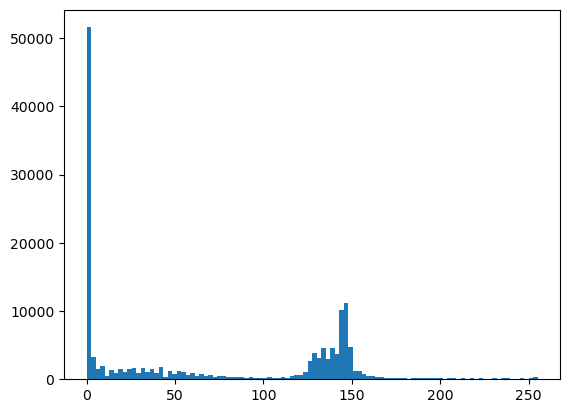

In [35]:
#calculating histogram
plt.hist(denoised_img.flat,bins=100,range=(0,255))

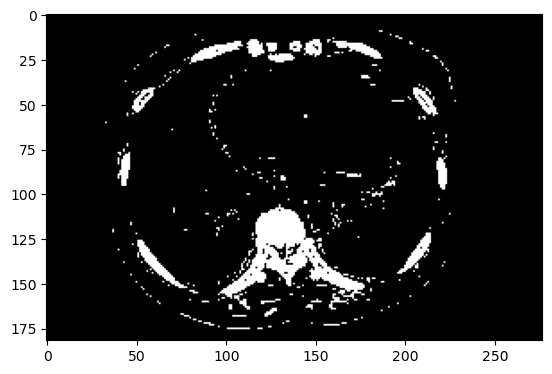

In [42]:
#segmenting for each valley
segmented = np.zeros((denoised_img.shape[0],denoised_img.shape[1],3))
segmented[denoised_img>150]=1
plt.imshow(segmented)